In [1]:
import sagemaker, boto3, json
from sagemaker import get_execution_role

aws_role = get_execution_role()

aws_region = boto3.Session().region_name
sess = sagemaker.Session()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[04/01/25 22:14:26] INFO     Found credentials from IAM Role:                                   ]8;id=760042;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=671936;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


[04/01/25 22:14:34] INFO     Found credentials from IAM Role:                                   ]8;id=446841;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=466527;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[04/01/25 22:14:35] INFO     Found credentials from IAM Role:                                   ]8;id=638697;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=130721;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [ ]:
#vanellsa data test loading

import pandas as pd
import boto3
import io
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define S3 bucket and prefix
s3_bucket = "testbucket1"
s3_prefix = "data_van_test/"

# Create S3 client
s3_client = boto3.client("s3")

# List all CSV files in the test_data folder
response = s3_client.list_objects_v2(Bucket=s3_bucket, Prefix=s3_prefix)

# Filter for CSV files
csv_files = [file["Key"] for file in response.get("Contents", []) if file["Key"].endswith(".csv")]

obj = s3_client.get_object(Bucket=s3_bucket, Key=csv_files[0])
df_test = pd.read_csv(io.BytesIO(obj["Body"].read()))

num_examples, num_columns = df_test.shape

# # Separate true labels and features
# ground_truth_label = df_test.iloc[:, 0]  # First column is the actual target (0/1)
# features = df_test.iloc[:, 1:]  # Rest are features
# # features=features.drop(['id'],axis=1)

[04/01/25 22:15:00] WARNING  Matplotlib is building the font cache; this may take a moment.    ]8;id=747887;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836189;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1095\1095]8;;\

[04/01/25 22:15:05] INFO     generated new fontManager                                         ]8;id=498624;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640883;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/matplotlib/font_manager.py#1639\1639]8;;\

[04/01/25 22:15:06] INFO     Found credentials from IAM Role:                                   ]8;id=703134;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=93183;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [3]:
ground_truth_label=df_test['fire_occurrence']
features=df_test.drop(['fire_occurrence'],axis=1)
features = features[sorted(features.columns)]

In [4]:
ground_truth_label.shape

#(8835374,)

(8054293,)

In [5]:
features.shape

(8054293, 29)

In [ ]:
import sagemaker
from sagemaker.model import Model
from sagemaker import image_uris, model_uris, script_uris
import boto3

# Initialize SageMaker session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()  # Or specify your IAM role string

# Select model ID and instance type
train_model_id = "lightgbm-classification-model"
train_model_version = "*"
train_scope = "training"
inference_instance_type = "ml.m5.large"

# Retrieve JumpStart image and script URIs
deploy_image_uri = image_uris.retrieve(
    region=sagemaker_session.boto_region_name,
    framework=None,
    image_scope="inference",
    model_id=train_model_id,
    model_version=train_model_version,
    instance_type=inference_instance_type,
)

deploy_source_uri = script_uris.retrieve(
    model_id=train_model_id,
    model_version=train_model_version,
    script_scope="inference"
)

# S3 path to your model.tar.gz (should contain model + inference logic if needed)
model_data_uri = "s3://testbucket1/model_van_final_2/built-in-algo-lightgbm-classification-m-2025-03-31-23-24-42-542/output/model.tar.gz"

# Create the Model object
model = Model(
    image_uri=deploy_image_uri,
    model_data=model_data_uri,
    source_dir=deploy_source_uri,
    entry_point="inference.py",  # this should be present in the deploy_source_uri
    role=role,
    sagemaker_session=sagemaker_session,
)

# Deploy the model
predictor = model.deploy(
    initial_instance_count=1,
    instance_type=inference_instance_type,
    endpoint_name="my-lightgbm-endpoint-fireguard-5"
)


[04/01/25 20:31:34] INFO     Repacking model artifact                                                  ]8;id=493226;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/model.py\model.py]8;;\:]8;id=17250;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/model.py#821\821]8;;\
                             (s3://rickypangtestbucket1/model_van_final_2/built-in-algo-lightgbm-class             
                             ification-m-2025-03-31-23-24-42-542/output/model.tar.gz), script artifact             
                             (s3://jumpstart-cache-prod-us-east-1/source-directory-tarballs/lightgbm/i             
                             nference/classification/v1.2.2/sourcedir.tar.gz), and dependencies ([])               
                             into single tar.gz file located at                                                    
                             s3://sagemaker-us-east-1-730335292805/pytorch-inference-2025-04-01-20-31-             
                             33-550/model.tar.gz. This may take some time depending on model size...               

[04/01/25 20:31:36] INFO     Creating model with name: sagemaker-jumpstart-2025-04-01-20-31-36-054  ]8;id=912911;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=713548;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name my-lightgbm-endpoint-fireguard-5    ]8;id=635599;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=78621;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5937\5937]8;;\

[04/01/25 20:31:37] INFO     Creating endpoint with name my-lightgbm-endpoint-fireguard-5           ]8;id=64554;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=612924;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4759\4759]8;;\

In [6]:
import boto3

sm_client = boto3.client("sagemaker")

# List all endpoints
response = sm_client.list_endpoints()
for ep in response["Endpoints"]:
    print(ep["EndpointName"])

my-lightgbm-endpoint-fireguard-5
pytorch-training-2025-03-19-01-37-55-599
lightgbmtest
sagemaker-scikit-learn-2025-03-17-23-23-50-200
sagemaker-scikit-learn-2024-08-15-23-34-23-658


In [7]:
endpoint_name='my-lightgbm-endpoint-fireguard-5'

In [8]:
content_type = "text/csv"


def query_endpoint(encoded_tabular_data):
    # endpoint_name = endpoint_name
    client = boto3.client("runtime.sagemaker")
    response = client.invoke_endpoint(
        EndpointName=endpoint_name, ContentType=content_type, Body=encoded_tabular_data
    )
    return response


def parse_response(query_response):
    model_predictions = json.loads(query_response["Body"].read())
    predicted_probabilities = model_predictions["probabilities"]
    return np.array(predicted_probabilities)


# split the test data into smaller size of batches to query the endpoint due to the large size of test data.
batch_size = 1500
predict_prob = []
for i in np.arange(0, num_examples, step=batch_size):
    query_response_batch = query_endpoint(
        features.iloc[i : (i + batch_size), :].to_csv(header=False, index=False).encode("utf-8")
    )
    predict_prob_batch = parse_response(query_response_batch)  # prediction probability per batch
    predict_prob.append(predict_prob_batch)

predict_prob = np.concatenate(predict_prob, axis=0)
# predict_label = np.argmax(
#     predict_prob, axis=1
# )  # Note. For binary classification, the model returns a array-like of shape (num_examples, 1),
# where each row is the probability of the positive label 1, assuming there are positive label (encoded as 1) and negative label (encoded as 0) in the target.
# To get the probability for both label 0 and 1, execute following code:
# predict_prob = np.vstack((1.0 - predict_prob, predict_prob)).transpose()
# predict_label = (np.array(predict_prob) >= 0.5).astype(int)

In [9]:
predict_prob[10]

array([0.17287265, 0.82712735])

In [10]:
predict_prob.shape

(8054293, 2)

In [11]:
mean = np.mean(predict_prob, axis=0)
min_ = np.min(predict_prob, axis=0)
max_ = np.max(predict_prob, axis=0)

print("Mean:", mean)
print("Min:", min_)
print("Max:", max_)

Mean: [0.74671094 0.25328906]
Min: [0.06851605 0.00596903]
Max: [0.99403097 0.93148395]


In [12]:
predict_label = np.argmax(predict_prob, axis=1)

In [13]:
predict_label

array([1, 0, 0, ..., 0, 0, 0])

In [14]:
import numpy as np

print("Count of 0s:", np.sum(predict_label == 0))
print("Count of 1s:", np.sum(predict_label == 1))

Count of 0s: 6125805
Count of 1s: 1928488


In [15]:
unique, counts = np.unique(predict_label, return_counts=True)
print(dict(zip(unique, counts)))

{0: 6125805, 1: 1928488}


In [16]:
import numpy as np

counts = np.bincount(predict_label)
print(f"Count of 0s: {counts[0]}")
print(f"Count of 1s: {counts[1]}")

Count of 0s: 6125805
Count of 1s: 1928488


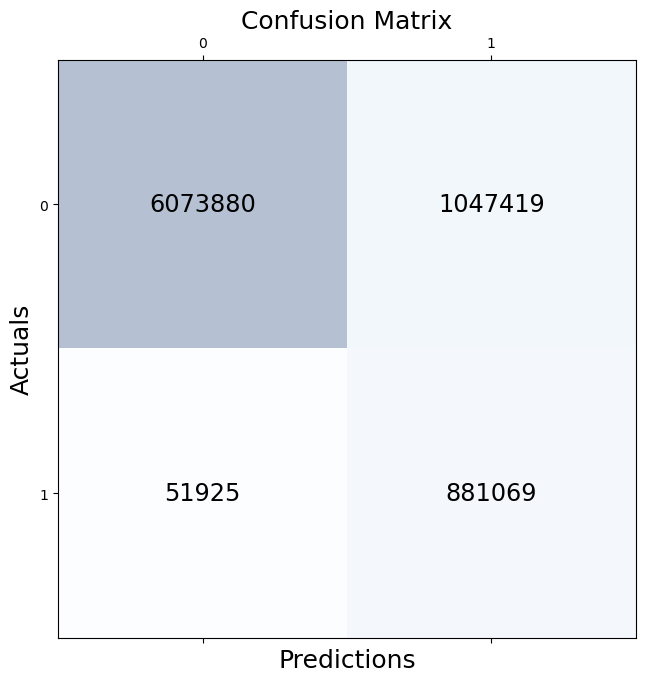

In [17]:
# Visualize the predictions results by plotting the confusion matrix.
conf_matrix = confusion_matrix(y_true=ground_truth_label.values, y_pred=predict_label)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va="center", ha="center", size="xx-large")

plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score

# Calculate Precision and Recall directly
precision = precision_score(ground_truth_label, predict_label)
recall = recall_score(ground_truth_label, predict_label)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.4569
Recall: 0.9443


In [19]:
# Measure the prediction results quantitatively.
eval_accuracy = accuracy_score(ground_truth_label.values, predict_label)
eval_f1_macro = f1_score(ground_truth_label.values, predict_label, average="macro")
eval_f1_micro = f1_score(ground_truth_label.values, predict_label, average="micro")

print(
    f"{accuracy_score.__name__}: {eval_accuracy}"
    f"F1 Macro: {eval_f1_macro}"
    f"F1 Micro: {eval_f1_micro}"
)

accuracy_score: 0.8635083178622879F1 Macro: 0.7664127839798661F1 Micro: 0.8635083178622879


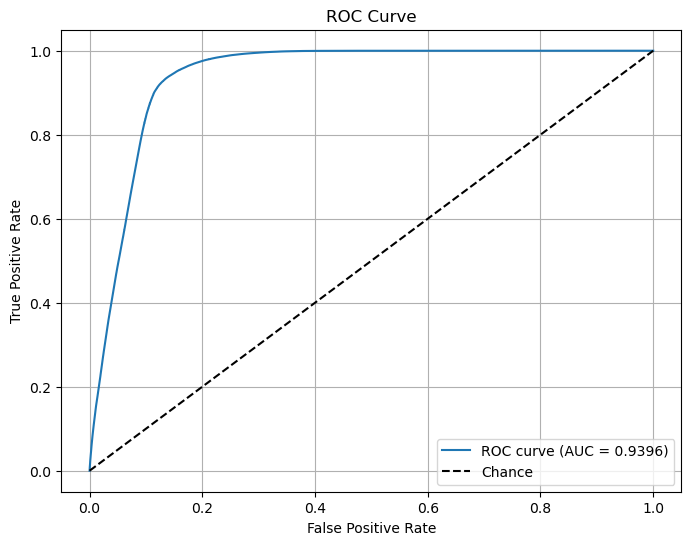

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use predicted probability for the positive class (label = 1)
y_scores = predict_prob[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ground_truth_label, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(ground_truth_label, predict_prob[:, 1])
print("AUC:", auc)


AUC: 0.9396239323774896
